In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import glob
from datetime import datetime,timedelta
import re

import warnings
warnings.filterwarnings('ignore')

In [17]:
plt.rcParams['font.family']=['NanumGothic', 'sans-serif']
plt.rcParams['axes.unicode_minus'] = False

In [18]:
files = glob.glob('G:\내 드라이브\Colab Notebooks\데이터분석\.data\서울열린데이터광장\서울시 서대문구 방문판매업 인허가 정보\*.csv')
files

['G:\\내 드라이브\\Colab Notebooks\\데이터분석\\.data\\서울열린데이터광장\\서울시 서대문구 방문판매업 인허가 정보\\서울시 서대문구 방문판매업 인허가 정보.csv']

In [19]:
df = pd.read_csv(files[0],encoding='cp949')
df.head()

,개방자치단체코드,관리번호,인허가일자,인허가취소일자,영업상태코드,영업상태명,상세영업상태코드,상세영업상태명,폐업일자,휴업시작일자,...,최종수정일자,데이터갱신구분,데이터갱신일자,업태구분명,좌표정보(X),좌표정보(Y),자산규모,부채총액,자본금,판매방식명
0,3120000,1996312010723200001,19960823,NaN,4,취소/말소/만료/정지/중지,7,직권말소,NaN,NaN,...,20130220175634,I,2018-08-31 23:59:59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3120000,1996312010723200004,19960830,NaN,3,폐업,3,폐업처리,20130911.0,NaN,...,20130911170953,I,2018-08-31 23:59:59.0,NaN,194297.832937,452570.312593,NaN,NaN,NaN,NaN
2,3120000,1996312010723200005,19961014,NaN,3,폐업,3,폐업처리,20080513.0,NaN,...,20080513141353,I,2018-08-31 23:59:59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3120000,1996312010723200007,19961029,NaN,3,폐업,3,폐업처리,20130902.0,NaN,...,20130902142806,I,2018-08-31 23:59:59.0,NaN,192500.456775,451806.103388,NaN,NaN,NaN,NaN
4,3120000,1996312010723200018,19961118,NaN,4,취소/말소/만료/정지/중지,7,직권말소,NaN,NaN,...,20181227130821,U,2018-12-29 02:40:00.0,NaN,193422.545074,453356.334098,NaN,NaN,NaN,NaN


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 29 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   개방자치단체코드  314 non-null    int64  
 1   관리번호      314 non-null    int64  
 2   인허가일자     314 non-null    int64  
 3   인허가취소일자   3 non-null      float64
 4   영업상태코드    314 non-null    int64  
 5   영업상태명     314 non-null    object 
 6   상세영업상태코드  314 non-null    int64  
 7   상세영업상태명   314 non-null    object 
 8   폐업일자      198 non-null    float64
 9   휴업시작일자    1 non-null      float64
 10  휴업종료일자    1 non-null      float64
 11  재개업일자     3 non-null      float64
 12  전화번호      233 non-null    object 
 13  소재지면적     0 non-null      float64
 14  소재지우편번호   180 non-null    float64
 15  지번주소      311 non-null    object 
 16  도로명주소     265 non-null    object 
 17  도로명우편번호   158 non-null    float64
 18  사업장명      314 non-null    object 
 19  최종수정일자    314 non-null    int64  
 20  데이터갱신구분   314 non-null    object

In [21]:
df.describe()

,개방자치단체코드,관리번호,인허가일자,인허가취소일자,영업상태코드,상세영업상태코드,폐업일자,휴업시작일자,휴업종료일자,재개업일자,...,소재지우편번호,도로명우편번호,최종수정일자,업태구분명,좌표정보(X),좌표정보(Y),자산규모,부채총액,자본금,판매방식명
count,314.0,3.140000e+02,3.140000e+02,3.0,314.000000,314.000000,1.980000e+02,1.0,1.0,3.000000e+00,...,180.000000,158.000000,3.140000e+02,0.0,278.000000,278.000000,7.500000e+01,6.800000e+01,7.800000e+01,0.0
mean,3120000.0,2.011255e+18,2.010682e+07,20150102.0,2.961783,3.630573,2.013595e+07,20210811.0,20220810.0,2.015409e+07,...,120324.044444,56168.449367,2.014544e+13,NaN,194376.184241,452832.659680,2.158014e+09,1.013675e+09,5.077412e+08,NaN
std,0.0,5.816408e+15,5.786685e+04,0.0,0.878463,1.931037,4.485179e+04,NaN,NaN,6.620811e+04,...,1650.568204,58283.103346,4.499671e+10,NaN,1524.498835,1376.004478,9.829152e+09,4.350286e+09,1.965408e+09,NaN
min,3120000.0,1.996312e+18,1.996010e+07,20150102.0,1.000000,1.000000,2.007053e+07,20210811.0,20220810.0,2.008103e+07,...,120012.000000,3602.000000,2.007072e+13,NaN,191526.125664,450451.593377,0.000000e+00,0.000000e+00,-1.648580e+08,NaN
25%,3120000.0,2.007312e+18,2.007064e+07,20150102.0,3.000000,3.000000,2.009317e+07,20210811.0,20220810.0,2.012608e+07,...,120091.000000,3677.250000,2.012044e+13,NaN,193288.837244,451713.181665,0.000000e+00,0.000000e+00,0.000000e+00,NaN
50%,3120000.0,2.010312e+18,2.010076e+07,20150102.0,3.000000,3.000000,2.013067e+07,20210811.0,20220810.0,2.017113e+07,...,120110.000000,3747.500000,2.014036e+13,NaN,194327.169494,452958.063245,4.887632e+07,9.670457e+06,4.000000e+07,NaN
75%,3120000.0,2.015312e+18,2.015033e+07,20150102.0,3.000000,3.000000,2.017062e+07,20210811.0,20220810.0,2.019062e+07,...,120170.000000,120137.750000,2.018123e+13,NaN,195366.250186,453830.336310,4.003120e+08,3.310591e+08,1.575000e+08,NaN
max,3120000.0,2.022312e+18,2.022121e+07,20150102.0,4.000000,7.000000,2.022111e+07,20210811.0,20220810.0,2.021011e+07,...,142100.000000,120866.000000,2.022121e+13,NaN,202537.911994,457556.846506,7.494576e+10,3.406958e+10,1.277039e+10,NaN


In [22]:
df.describe(include=np.object)

,영업상태명,상세영업상태명,전화번호,지번주소,도로명주소,사업장명,데이터갱신구분,데이터갱신일자
count,314,314,233,311,265,314,314,314
unique,4,5,210,246,243,307,2,69
top,폐업,폐업처리,02-,서울특별시 서대문구 홍제동 ***번지 **호,서울특별시 서대문구 통일로 *** (홍제동),금성케미칼,I,2018-08-31 23:59:59.0
freq,198,198,11,12,5,3,244,229


In [23]:
df.isnull().sum()

개방자치단체코드      0
관리번호          0
인허가일자         0
인허가취소일자     311
영업상태코드        0
영업상태명         0
상세영업상태코드      0
상세영업상태명       0
폐업일자        116
휴업시작일자      313
휴업종료일자      313
재개업일자       311
전화번호         81
소재지면적       314
소재지우편번호     134
지번주소          3
도로명주소        49
도로명우편번호     156
사업장명          0
최종수정일자        0
데이터갱신구분       0
데이터갱신일자       0
업태구분명       314
좌표정보(X)      36
좌표정보(Y)      36
자산규모        239
부채총액        246
자본금         236
판매방식명       314
dtype: int64

**영업상태명, 상세영업상태명 분포는?**

**자산규모, 부채총액, 자본금 분포는?**

**영업상태별 자산규모, 부채총액, 자본금은?**

**자치구, 도시 분포는?**

**도시별 영업상태는?**

**사업기간 분포는?**

**자치구별 평균 사업기간은?**

## 전처리

In [24]:
drop_cols = ['개방자치단체코드','관리번호','인허가취소일자','영업상태코드','상세영업상태코드','폐업일자','휴업시작일자','휴업종료일자','재개업일자',
'소재지면적','전화번호','소재지우편번호','도로명우편번호','도로명주소','업태구분명','판매방식명']
df = df.drop(drop_cols,axis=1)

In [29]:
df.head(10)

,인허가일자,영업상태명,상세영업상태명,지번주소,사업장명,최종수정일자,데이터갱신구분,데이터갱신일자,좌표정보(X),좌표정보(Y),자산규모,부채총액,자본금
0,19960823,취소/말소/만료/정지/중지,직권말소,서울특별시 서대문구 홍제*동 ***번지 **호 *층,(주)건강리더,20130220175634,I,2018-08-31 23:59:59.0,NaN,NaN,NaN,NaN,NaN
1,19960830,폐업,폐업처리,서울특별시 서대문구 연희동 ***번지 대림상가 ***호,아현건강생활,20130911170953,I,2018-08-31 23:59:59.0,194297.832937,452570.312593,NaN,NaN,NaN
2,19961014,폐업,폐업처리,은평구 역촌동 **-**,A+과학나라서부지사,20080513141353,I,2018-08-31 23:59:59.0,NaN,NaN,NaN,NaN,NaN
3,19961029,폐업,폐업처리,서울특별시 서대문구 남가좌동 ***번지 *호 *층,마임북가좌지사,20130902142806,I,2018-08-31 23:59:59.0,192500.456775,451806.103388,NaN,NaN,NaN
4,19961118,취소/말소/만료/정지/중지,직권말소,서울특별시 서대문구 홍은동 ***번지 *호 *층,쉐보레명지대리점,20181227130821,U,2018-12-29 02:40:00.0,193422.545074,453356.334098,NaN,NaN,NaN
5,19961207,폐업,폐업처리,서울특별시 서대문구 북아현동 ***번지 **호 굴레방빌딩 *층,현대영어사,20150120131034,I,2018-08-31 23:59:59.0,196253.551981,450587.038797,NaN,NaN,NaN
6,19961207,영업/정상,정상영업,서울특별시 서대문구 북가좌동 **번지 *호 스카이빌,㈜현대엘리트,20180118162626,I,2018-08-31 23:59:59.0,192552.192064,453030.926928,0.0,0.0,0.0
7,19971229,폐업,폐업처리,서대문구홍은동 ***- 벽산@*** ***,할수있다컴퓨터수학교실,20080125134820,I,2018-08-31 23:59:59.0,193998.104669,453150.854122,NaN,NaN,NaN
8,19990708,폐업,폐업처리,고양시덕양구토당동***-**윤창빌라***,현대북아현판매대리점,20071227132725,I,2018-08-31 23:59:59.0,NaN,NaN,NaN,NaN,NaN
9,19990901,폐업,폐업처리,서울특별시 서대문구 홍제*동 ***번지 *호,정산생명공학 서대문지사,20211224100723,U,2021-12-26 02:40:00.0,195297.115525,453758.055554,0.0,0.0,0.0


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   인허가일자    314 non-null    int64  
 1   영업상태명    314 non-null    object 
 2   상세영업상태명  314 non-null    object 
 3   지번주소     311 non-null    object 
 4   사업장명     314 non-null    object 
 5   최종수정일자   314 non-null    int64  
 6   데이터갱신구분  314 non-null    object 
 7   데이터갱신일자  314 non-null    object 
 8   좌표정보(X)  278 non-null    float64
 9   좌표정보(Y)  278 non-null    float64
 10  자산규모     75 non-null     float64
 11  부채총액     68 non-null     float64
 12  자본금      78 non-null     float64
dtypes: float64(5), int64(2), object(6)
memory usage: 32.0+ KB


In [58]:
df['지번주소'].fillna('None',inplace=True)
df.fillna(0,inplace=True)

In [180]:
def convert_area(x):
    area = re.findall(r'(.*?구)',x)
    if not area:
        return 'None'
    elif area[0] == '구':
        return '구로구'
    else:
        return area[0].split('시')[-1].strip()

def convert_city(x):
    city = re.findall(r'(.*?시)',x)
    if not city:
        city = '서울특별시'
        return city
    elif city[0] == '서대문구연희동**-*시' or city[0] == '서초구서초동****-*서초리시':
        return '서울특별시'
    else:
        return city[0]

df['자치구'] = df['지번주소'].apply(convert_area)
df['도시'] = df['지번주소'].apply(convert_city)

In [77]:
(datetime.strptime('19960823','%Y%m%d')-datetime.strptime('20130220175634'[:8],'%Y%m%d')).days

-6025

In [82]:
df['최종수정일자'] = df['최종수정일자'].apply(lambda x : int(str(x)[:8]))

In [116]:
period = df['최종수정일자'].apply(lambda x : datetime.strptime(str(x),'%Y%m%d')) - df['인허가일자'].apply(lambda x : datetime.strptime(str(x),'%Y%m%d'))
df['사업기간'] = period.apply(lambda x : x.days//365)

In [117]:
df.head()

,인허가일자,영업상태명,상세영업상태명,지번주소,사업장명,최종수정일자,데이터갱신구분,데이터갱신일자,좌표정보(X),좌표정보(Y),자산규모,부채총액,자본금,자치구,도시,사업기간
0,19960823,취소/말소/만료/정지/중지,직권말소,서울특별시 서대문구 홍제*동 ***번지 **호 *층,(주)건강리더,20130220,I,2018-08-31 23:59:59.0,0.000000,0.000000,0.0,0.0,0.0,서대문구,서울특별시,16
1,19960830,폐업,폐업처리,서울특별시 서대문구 연희동 ***번지 대림상가 ***호,아현건강생활,20130911,I,2018-08-31 23:59:59.0,194297.832937,452570.312593,0.0,0.0,0.0,서대문구,서울특별시,17
2,19961014,폐업,폐업처리,은평구 역촌동 **-**,A+과학나라서부지사,20080513,I,2018-08-31 23:59:59.0,0.000000,0.000000,0.0,0.0,0.0,은평구,서울특별시,11
3,19961029,폐업,폐업처리,서울특별시 서대문구 남가좌동 ***번지 *호 *층,마임북가좌지사,20130902,I,2018-08-31 23:59:59.0,192500.456775,451806.103388,0.0,0.0,0.0,서대문구,서울특별시,16
4,19961118,취소/말소/만료/정지/중지,직권말소,서울특별시 서대문구 홍은동 ***번지 *호 *층,쉐보레명지대리점,20181227,U,2018-12-29 02:40:00.0,193422.545074,453356.334098,0.0,0.0,0.0,서대문구,서울특별시,22


## 시각화

[Text(0.5, 1.0, '상세영업상태별 분포')]

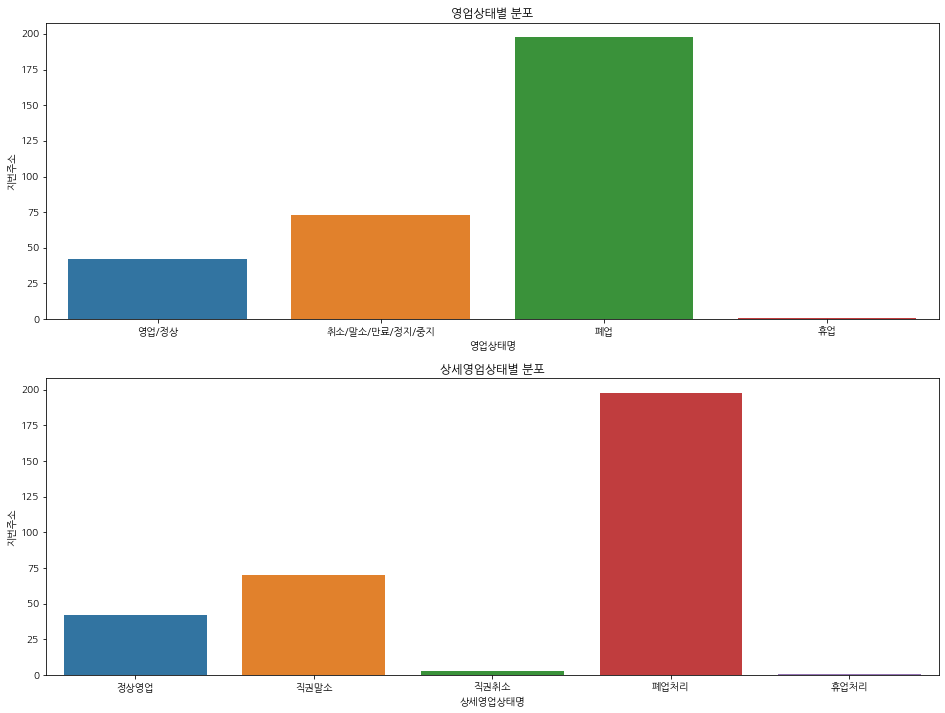

In [125]:
fig,axes = plt.subplots(2,1,figsize=(16,12))
sub_df1 = df.groupby(['영업상태명'],as_index=False)['지번주소'].count()
sub_df2 = df.groupby(['상세영업상태명'],as_index=False)['지번주소'].count()
sns.barplot(data=sub_df1,x='영업상태명',y='지번주소',ax=axes[0]).set(title='영업상태별 분포')
sns.barplot(data=sub_df2,x='상세영업상태명',y='지번주소',ax=axes[1]).set(title='상세영업상태별 분포')

[Text(0.5, 1.0, '자본금')]

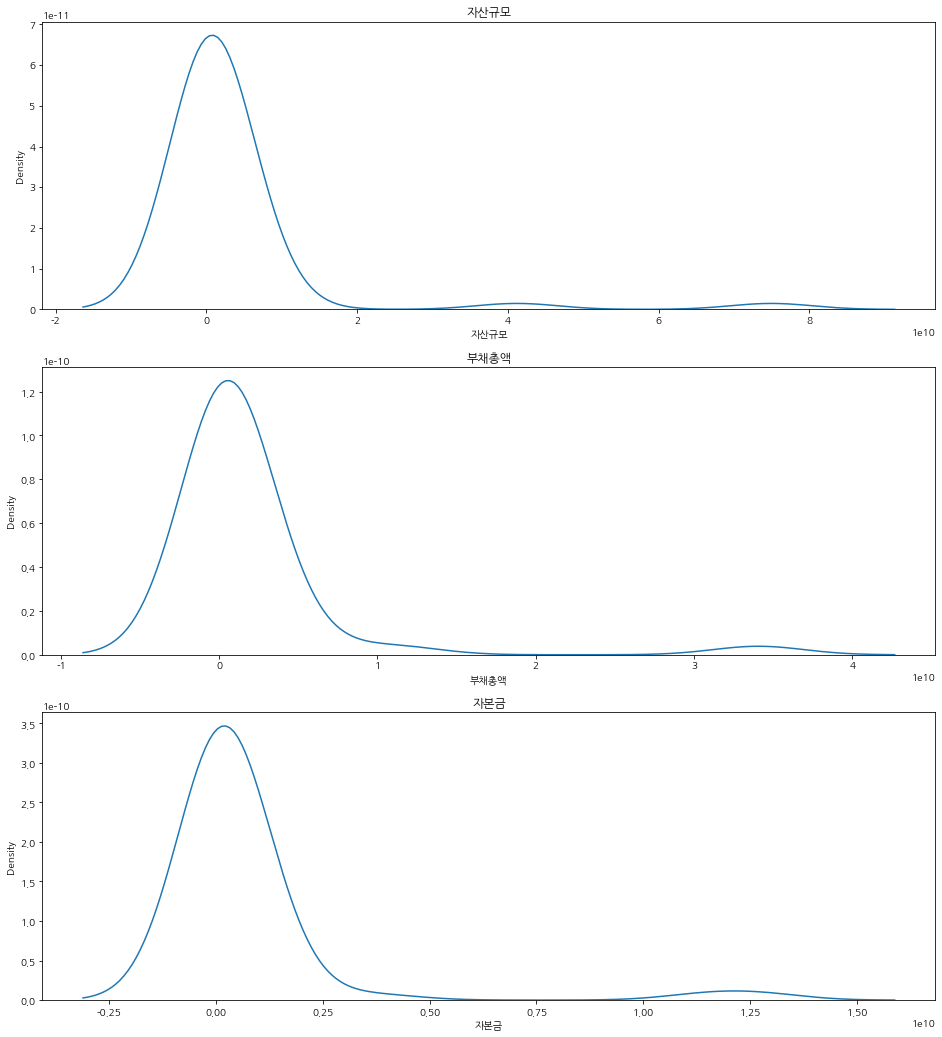

In [202]:
fig,axes = plt.subplots(3,1,figsize=(16,18))
sns.kdeplot(data=df[df['자산규모']>1]['자산규모'],ax=axes[0]).set(title='자산규모')
sns.kdeplot(data=df[df['부채총액']>1]['부채총액'],ax=axes[1]).set(title='부채총액')
sns.kdeplot(data=df[df['자본금']>1]['자본금'],ax=axes[2]).set(title='자본금')

[Text(0.5, 1.0, '영업상태별 자본금')]

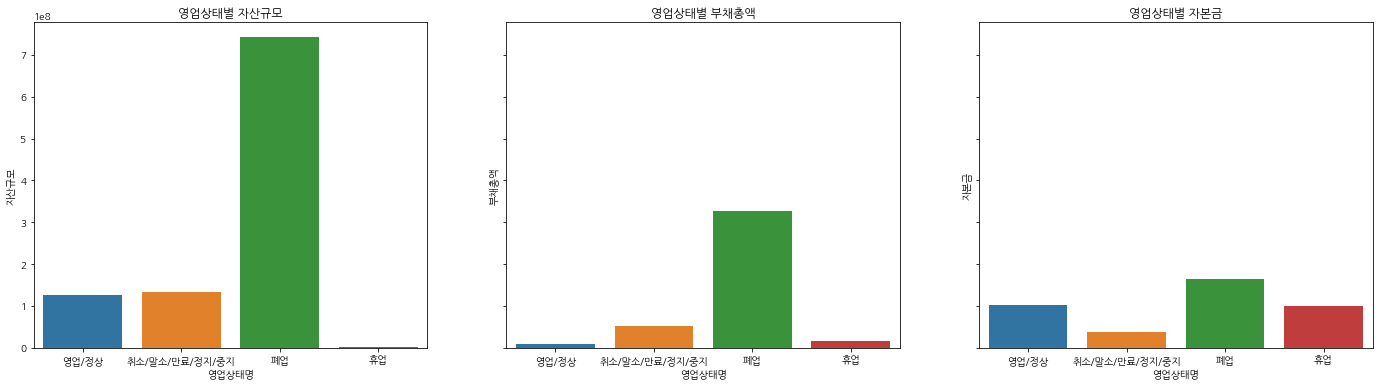

In [173]:
sub_df1 = df.groupby(['영업상태명'],as_index=False)['자산규모'].mean()
sub_df2 = df.groupby(['영업상태명'],as_index=False)['부채총액'].mean()
sub_df3 = df.groupby(['영업상태명'],as_index=False)[['자본금']].mean()
fig,axes = plt.subplots(1,3,figsize=(24,6),sharey=True)
sns.barplot(data=sub_df1,x='영업상태명',y='자산규모',ax=axes[0]).set(title='영업상태별 자산규모')
sns.barplot(data=sub_df2,x='영업상태명',y='부채총액',ax=axes[1]).set(title='영업상태별 부채총액')
sns.barplot(data=sub_df3,x='영업상태명',y='자본금',ax=axes[2]).set(title='영업상태별 자본금')

[Text(0.5, 1.0, '도시 분포')]

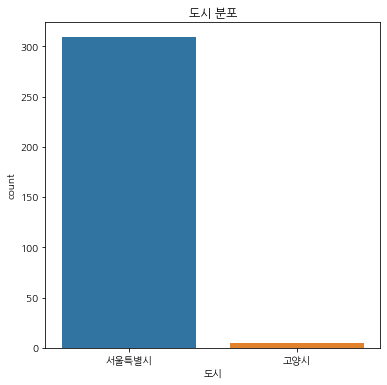

In [176]:
plt.figure(figsize=(6,6))
sns.countplot(data=df,x='도시').set(title='도시 분포')

[Text(0.5, 1.0, '자치구 분포')]

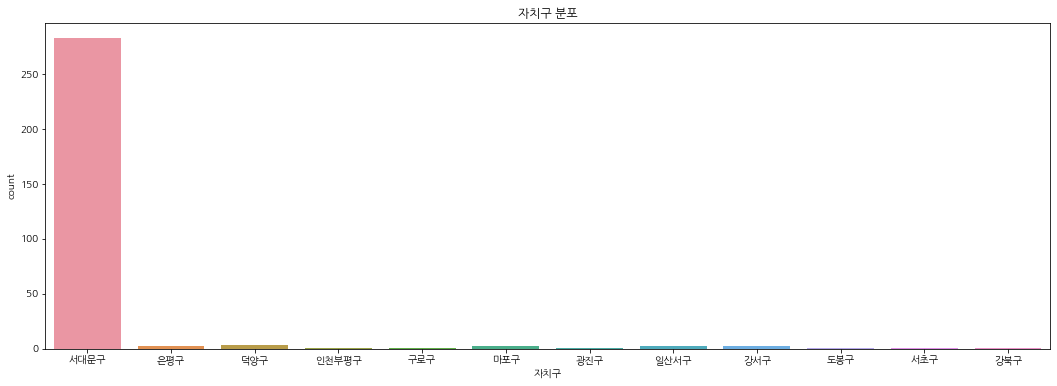

In [203]:
plt.figure(figsize=(18,6))
sns.countplot(data=df[df['자치구']!='None'],x='자치구').set(title='자치구 분포')

[Text(0.5, 1.0, '자치구 분포')]

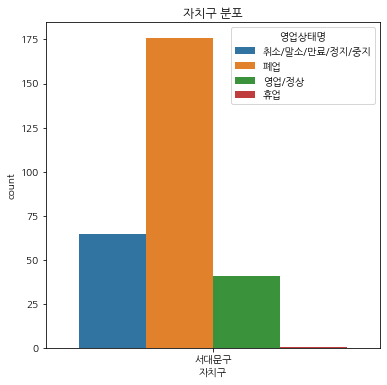

In [199]:
plt.figure(figsize=(6,6))
sns.countplot(data=df[df['자치구']=='서대문구'],x='자치구',hue='영업상태명').set(title='자치구 분포')

[Text(0.5, 1.0, '자치구 분포')]

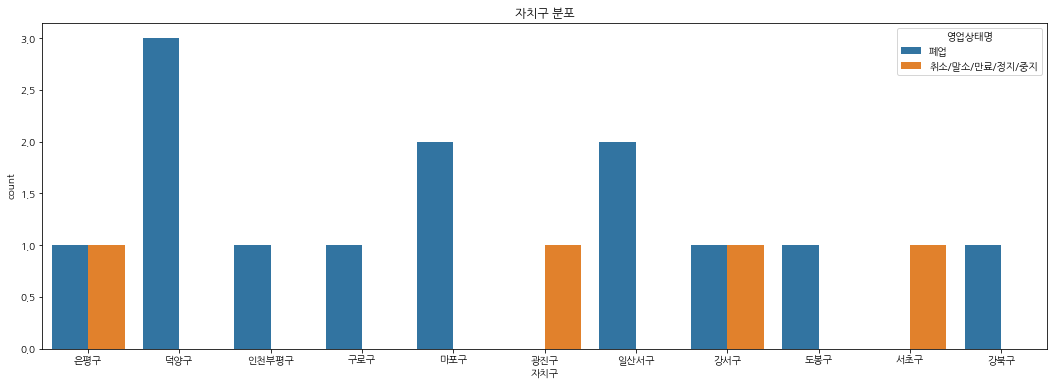

In [198]:
plt.figure(figsize=(18,6))
sns.countplot(data=df[(df['자치구']!='None')&(df['자치구']!='서대문구')],x='자치구',hue='영업상태명').set(title='자치구 분포')

[Text(0.5, 1.0, '도시별 영업상태')]

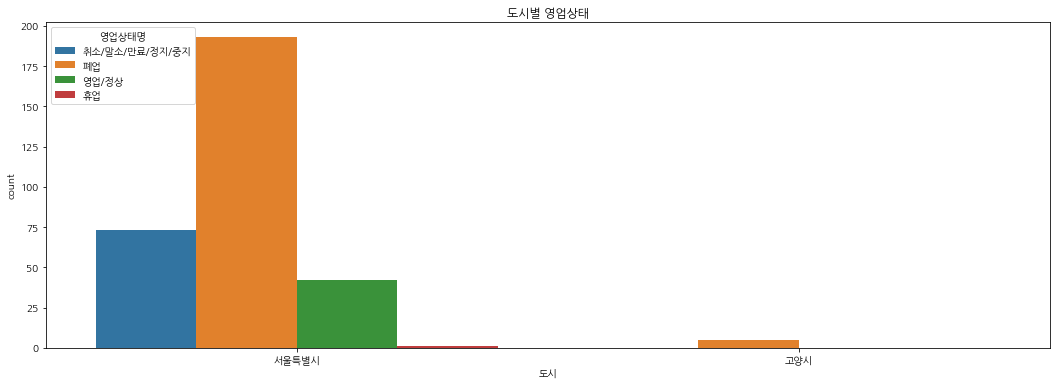

In [191]:
plt.figure(figsize=(18,6))
sns.countplot(data=df,x='도시',hue='영업상태명').set(title='도시별 영업상태')

[Text(0.5, 1.0, '사업기간(년)')]

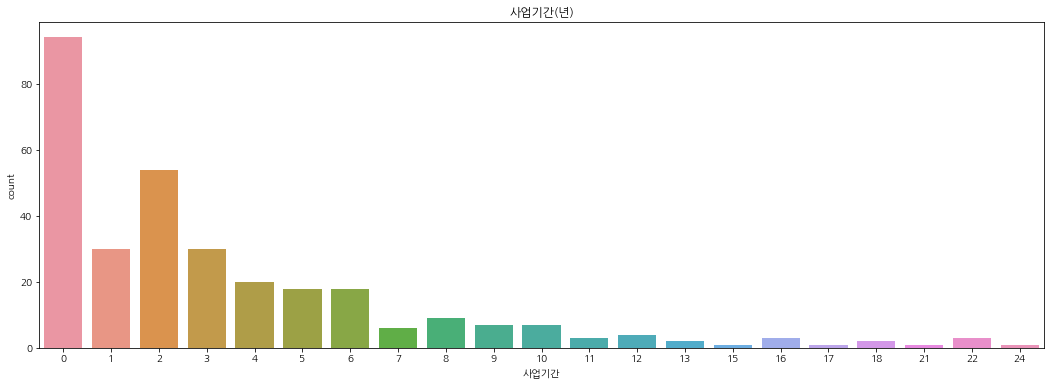

In [190]:
plt.figure(figsize=(18,6))
sns.countplot(data=df.sort_values('사업기간'),x='사업기간').set(title='사업기간(년)')

[Text(0.5, 1.0, '자치구별 사업기간')]

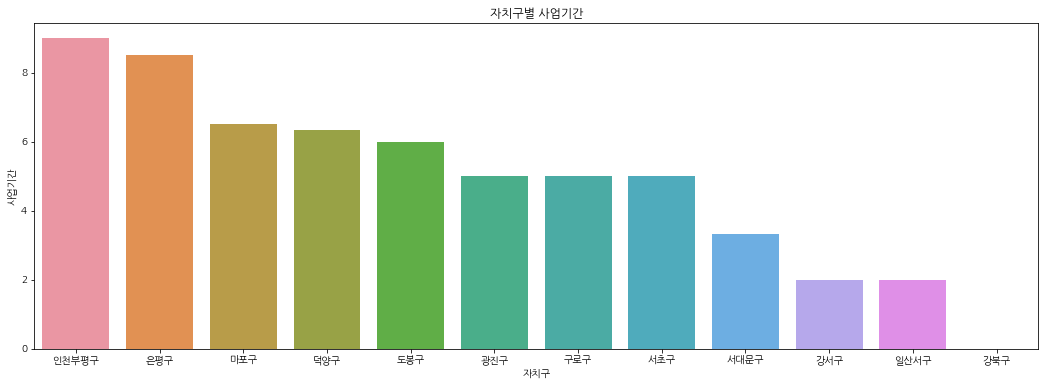

In [195]:
plt.figure(figsize=(18,6))
sub_df = df[df['자치구']!='None'].groupby(['자치구'],as_index=False)['사업기간'].mean()
sns.barplot(data=sub_df.sort_values('사업기간',ascending=False),x='자치구',y='사업기간').set(title='자치구별 사업기간')

**영업상태명, 상세영업상태명 분포는?**

- 폐업 상태가 대부분이고 취소 및 말소, 정상, 휴업 순으로 크다.

- 취소 및 말소의 경우 직권말소인 경우가 대부분이다.

**자산규모, 부채총액, 자본금 분포는?**

- 자산규모, 부채총액, 자본금의 경우 수천만원-수억원 사이가 대부분이나 자본의 편차가 크다.

**영업상태별 자산규모, 부채총액, 자본금은?**

- 폐업, 취소 및 말소의 경우 자본금보다 부채총액이 높지만 정상,휴업의 경우 부채총액보다 자본금이 더 높다.

**자치구, 도시 분포는?**

- 대부분 서울특별시이다.

- 서대문구가 대부분을 차지하며, 서대문구를 제외한 구는 모두 폐업, 취소 및 말소 상태다.

**도시별 영업상태는?**

- 서울특별시는 전체 분포와 비슷하고 고양시는 모두 폐업 상태이다.

**사업기간 분포는?**

- 사업의 30%이상은 1년안에 폐업을 하고, 이를 제외하면 2년동안 사업을 유지하는 비율이 가장 높다.

- 일반적으로 0년-6년동안 사업이 유지된다.

**자치구별 평균 사업기간은?**

- 인천부평구와 은평구가 평균 8년이상 가장 오래 사업을 유지한다.

- 강북구가 평균 0년으로 가장 사업기간이 짧고, 강서구와 은평구가 평균 3년정도로 강북구 다음으로 사업기간이 짧다.